In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train=pd.read_csv(r"C:\Users\veda.nair\Desktop\Documents\Linear regression model-house price\house-prices-advanced-regression-techniques\house_prices_train.csv")

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


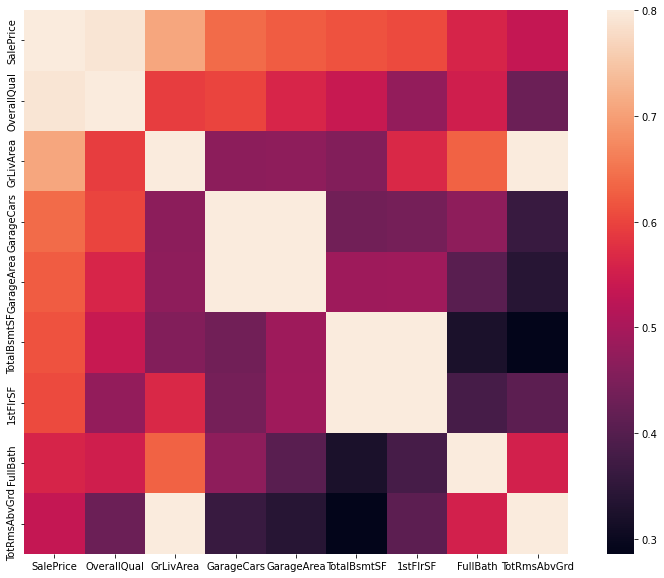

In [12]:
corrmat = df_train.corr()
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

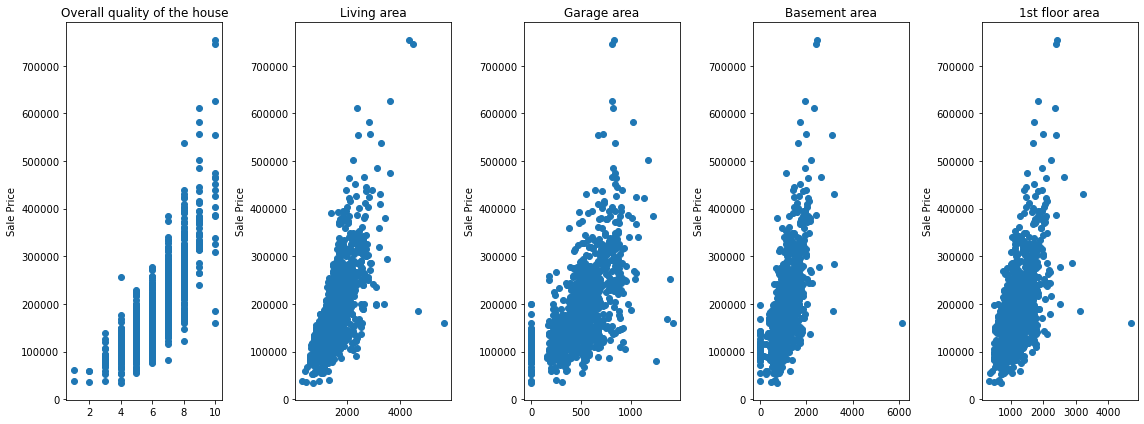

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(16,6))

axes[0].plot(df_train['OverallQual'],df_train['SalePrice'],'o')
axes[0].set_ylabel("Sale Price")
axes[0].set_title("Overall quality of the house")

axes[1].plot(df_train['GrLivArea'],df_train['SalePrice'],'o')
axes[1].set_title("Living area")
axes[1].set_ylabel("Sale Price")

axes[2].plot(df_train['GarageArea'],df_train['SalePrice'],'o')
axes[2].set_title("Garage area");
axes[2].set_ylabel("Sale Price")
plt.tight_layout();

axes[3].plot(df_train['TotalBsmtSF'],df_train['SalePrice'],'o')
axes[3].set_title("Basement area");
axes[3].set_ylabel("Sale Price")
plt.tight_layout();

axes[4].plot(df_train['1stFlrSF'],df_train['SalePrice'],'o')
axes[4].set_title("1st floor area");
axes[4].set_ylabel("Sale Price")
plt.tight_layout();

In [21]:
X=df_train[['GrLivArea', 'GarageArea','TotalBsmtSF','1stFlrSF']]
y = df_train['SalePrice']

In [28]:
X.shape

(1460, 4)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
X_train.shape

(1022, 4)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
test_predictions = model.predict(X_test)

In [35]:
MAE=mean_absolute_error(y_test,test_predictions)
MSE=mean_squared_error(y_test,test_predictions)
RMSE=np.sqrt(MSE)

In [36]:
MAE

30853.17412274349

In [37]:
MSE

2998495486.221577

In [38]:
RMSE

54758.5197592263

In [40]:
df_train['SalePrice'].mean()

180921.19589041095

In [41]:
test_predictions = model.predict(X_test)

In [43]:
test_res = y_test - test_predictions

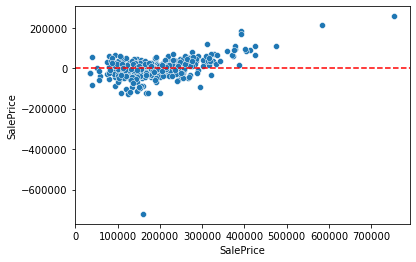

In [44]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

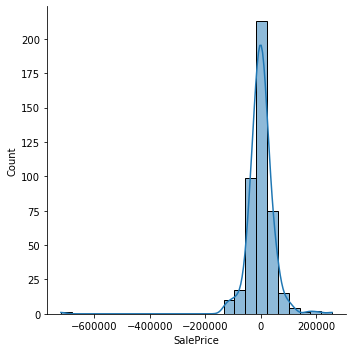

In [45]:
sns.displot(test_res,bins=25,kde=True)

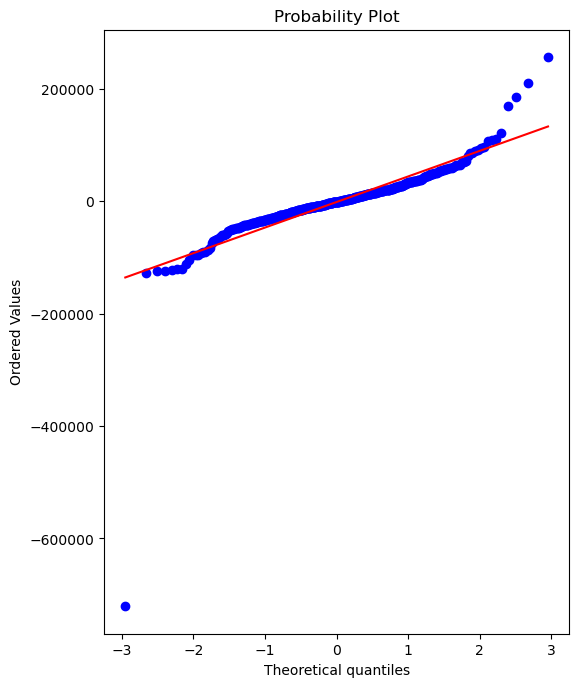

In [46]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)

In [47]:
#Retraining model on full data
final_model=LinearRegression()

In [48]:
final_model.fit(X,y)

LinearRegression()

In [49]:
y_hat = final_model.predict(X)

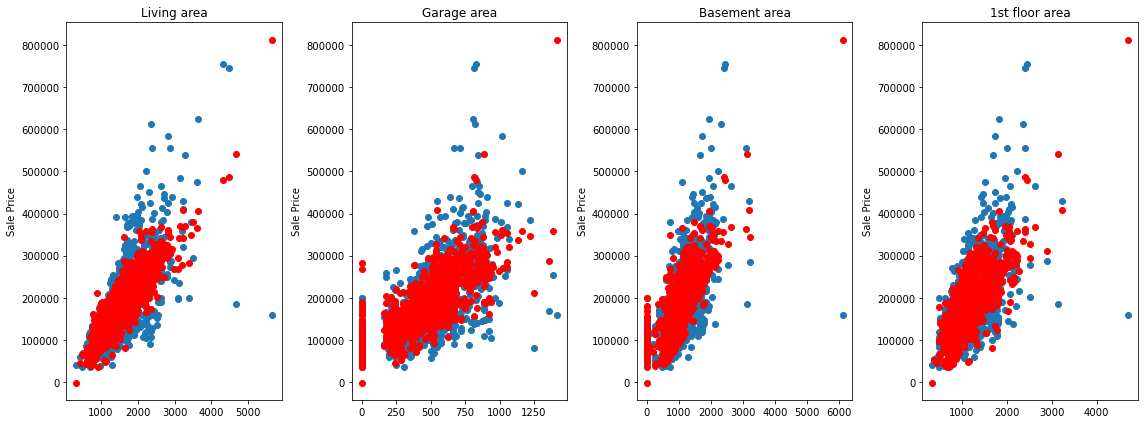

In [54]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))

axes[0].plot(df_train['GrLivArea'],df_train['SalePrice'],'o')
axes[0].plot(df_train['GrLivArea'],y_hat,'o',color='red')
axes[0].set_title("Living area")
axes[0].set_ylabel("Sale Price")

axes[1].plot(df_train['GarageArea'],df_train['SalePrice'],'o')
axes[1].plot(df_train['GarageArea'],y_hat,'o',color='red')
axes[1].set_title("Garage area");
axes[1].set_ylabel("Sale Price")
plt.tight_layout();

axes[2].plot(df_train['TotalBsmtSF'],df_train['SalePrice'],'o')
axes[2].plot(df_train['TotalBsmtSF'],y_hat,'o',color='red')
axes[2].set_title("Basement area");
axes[2].set_ylabel("Sale Price")
plt.tight_layout();

axes[3].plot(df_train['1stFlrSF'],df_train['SalePrice'],'o')
axes[3].plot(df_train['1stFlrSF'],y_hat,'o',color='red')
axes[3].set_title("1st floor area");
axes[3].set_ylabel("Sale Price")
plt.tight_layout();

In [55]:
residuals = y_hat - y

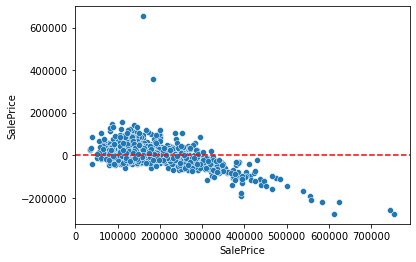

In [56]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [57]:
final_model.coef_

array([ 70.01216494, 103.92351015,  53.70490633,  -7.46244511])

In [58]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GrLivArea,70.012165
GarageArea,103.923510
TotalBsmtSF,53.704906
1stFlrSF,-7.462445


In [71]:
#Testing data
df_test_data=[[896,730,882,896]]

In [73]:
final_model.predict(df_test_data)

C:\Users\veda.nair\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([156829.87250215])